<a href="https://colab.research.google.com/github/amiryarahmadi/M33/blob/main/M33_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Split Q to subbands

In [ ]:
from astropy.io import fits

# Input FITS file
input_fits = "/content/drive/MyDrive/M33/M33Q_Mosaic.fits"

# Open the FITS file
with fits.open(input_fits) as hdul:
    # Get the data and header
    data = hdul[0].data  # Assuming the data is in the primary HDU
    header = hdul[0].header

    # Loop through spectral bands 3 to 18 (Python index 2 to 17)
    for i in range(2, 18):  # Python indices for bands 3 to 18
        single_band_data = data[0, i, :, :]  # Extract the i-th band; shape will be (1500, 1500)

        # Copy and update the header
        single_band_header = header.copy()
        single_band_header['NAXIS'] = 2  # Update NAXIS to 2 (2D spatial data only)

        # Remove spectral axis keywords and any other unnecessary keywords
        for key in ['NAXIS3', 'CRPIX3', 'CRVAL3', 'CDELT3', 'CTYPE3', 'NAXIS4', 'CRPIX4', 'CRVAL4', 'CDELT4', 'CTYPE4']:
            if key in single_band_header:
                del single_band_header[key]

        # Create an output filename for each band
        output_fits = f"M33_Q_subband_{i+1}.fits"

        # Write the single-band data to a new FITS file
        fits.writeto(output_fits, single_band_data, single_band_header, overwrite=True)
        print(f"Saved spectral band {i+1} to {output_fits}")

#Split U to subbands

In [ ]:
from astropy.io import fits

# Input FITS file
input_fits = "/content/drive/MyDrive/M33/M33U_Mosaic.fits"

# Open the FITS file
with fits.open(input_fits) as hdul:
    # Get the data and header
    data = hdul[0].data  # Assuming the data is in the primary HDU
    header = hdul[0].header

    # Loop through spectral bands 3 to 18 (Python index 2 to 17)
    for i in range(2, 18):  # Python indices for bands 3 to 18
        single_band_data = data[0, i, :, :]  # Extract the i-th band; shape will be (1500, 1500)

        # Copy and update the header
        single_band_header = header.copy()
        single_band_header['NAXIS'] = 2  # Update NAXIS to 2 (2D spatial data only)

        # Remove spectral axis keywords and any other unnecessary keywords
        for key in ['NAXIS3', 'CRPIX3', 'CRVAL3', 'CDELT3', 'CTYPE3', 'NAXIS4', 'CRPIX4', 'CRVAL4', 'CDELT4', 'CTYPE4']:
            if key in single_band_header:
                del single_band_header[key]

        # Create an output filename for each band
        output_fits = f"M33_U_subband_{i+1}.fits"

        # Write the single-band data to a new FITS file
        fits.writeto(output_fits, single_band_data, single_band_header, overwrite=True)
        print(f"Saved spectral band {i+1} to {output_fits}")

#Rotation Measure for $3\sigma$ rms noise

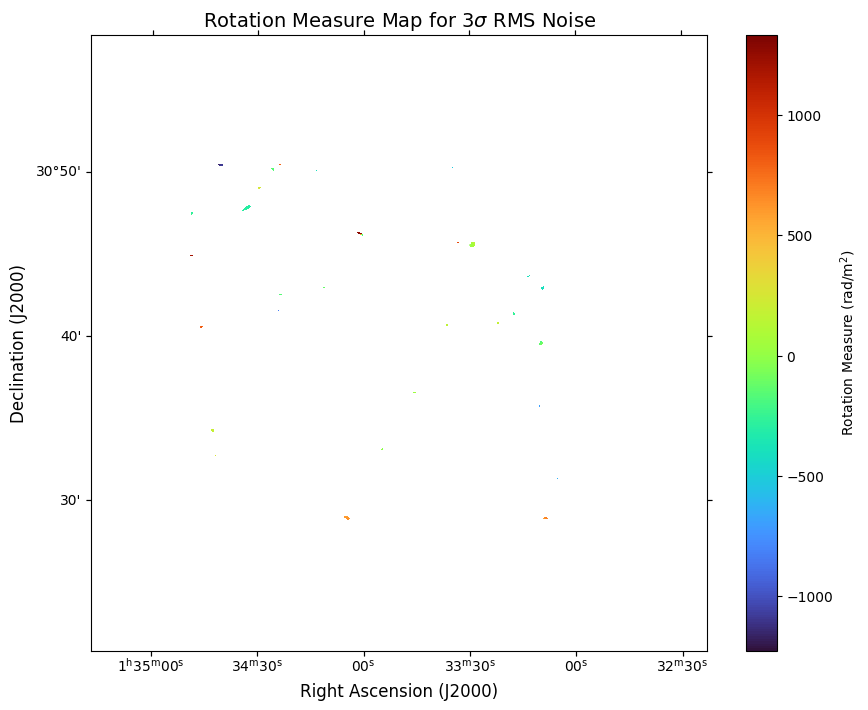

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/M33_PA_Clip_3sgm_sub3.fits'
pola_chn18 = '/content/drive/MyDrive/M33/M33_PA_clp_3sgm_sub18.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Plot RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM.squeeze(), origin='lower', cmap='turbo')  # Squeeze removes unnecessary dimensions
plt.colorbar(im, ax=ax, label='Rotation Measure (rad/m$^2$)')
ax.set_title('Rotation Measure Map for 3$\sigma$ RMS Noise', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()


In [ ]:
from astropy.io import fits

# Create a new FITS file with the RM map data
output_fits_path = '/content/drive/MyDrive/M33/RM_Map.fits'

# Create a new FITS header by copying the WCS information
header = wcs.to_header()  # Convert WCS to FITS header

# Create a new Primary HDU with data and header
hdu = fits.PrimaryHDU(data=RM, header=header)

# Write the FITS file to disk
hdu.writeto(output_fits_path, overwrite=True)

print(f"RM map saved to: {output_fits_path}")


RM map saved to: /content/drive/MyDrive/M33/RM_Map.fits


#Rotation Measure for foreground correction(3$\sigma$rms noise)

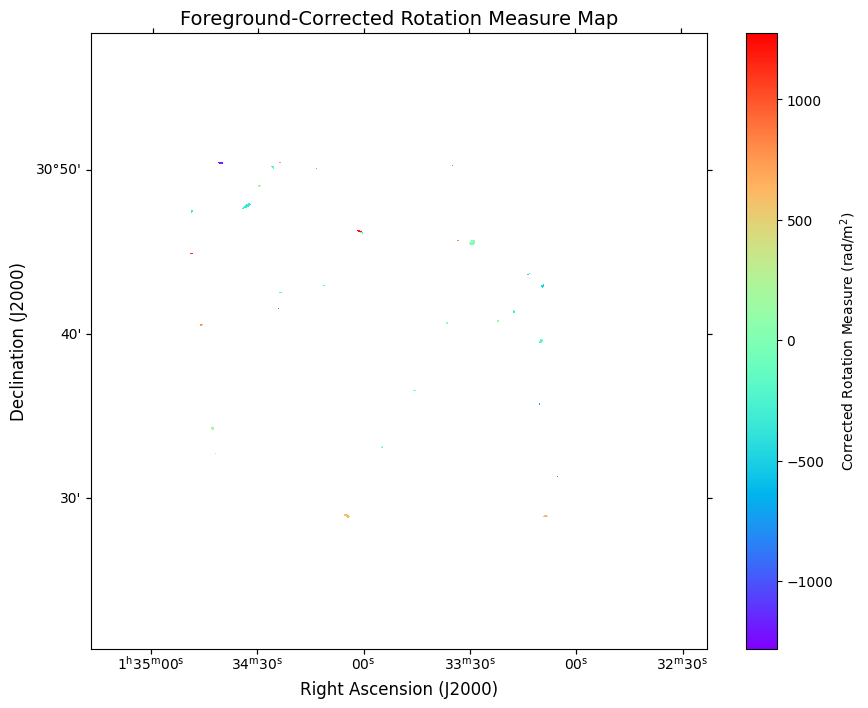

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/M33_PA_Clip_3sgm_sub3.fits'
pola_chn18 = '/content/drive/MyDrive/M33/M33_PA_clp_3sgm_sub18.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Apply foreground correction
forground = -55
RM_cor = RM + forground  # Adding the foreground correction value

# Plot corrected RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM_cor.squeeze(), origin='lower', cmap='rainbow')  # Plot corrected RM map
plt.colorbar(im, ax=ax, label='Corrected Rotation Measure (rad/m$^2$)')
ax.set_title('Foreground-Corrected Rotation Measure Map', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()


#Histogram of RM

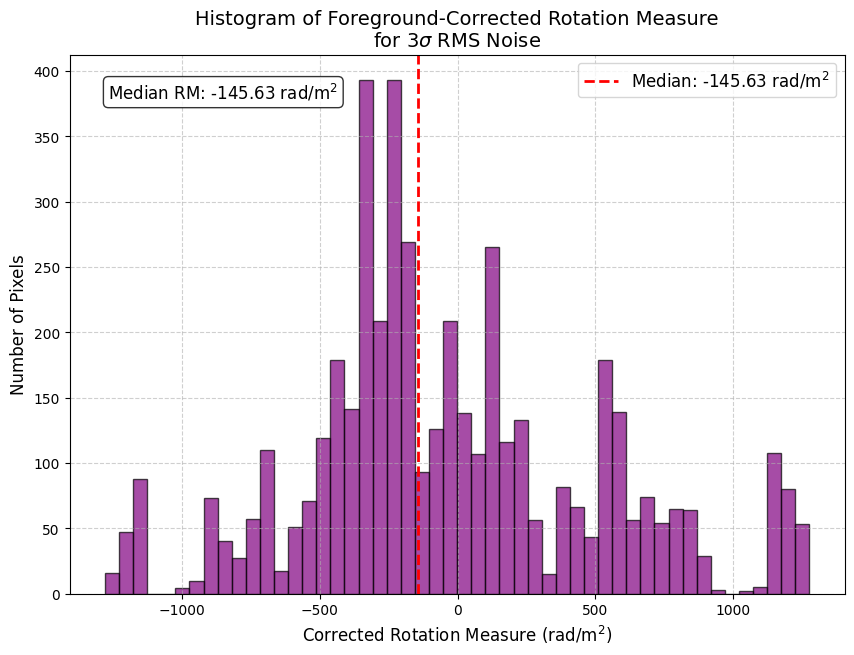

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the corrected RM map to a 1D array, removing NaN values
rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]  # Remove NaN values

# Calculate the median
rm_median = np.median(rm_data_corrected)

# Plot the histogram
plt.figure(figsize=(10, 7))
plt.hist(rm_data_corrected, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Foreground-Corrected Rotation Measure\nfor 3$\sigma$ RMS Noise', fontsize=14)
plt.xlabel('Corrected Rotation Measure (rad/m$^2$)', fontsize=12)
plt.ylabel('Number of Pixels', fontsize=12)
plt.axvline(rm_median, color='red', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.legend(fontsize=12)

# Add a text box with the median value
textstr = f'Median RM: {rm_median:.2f} rad/m$^2$'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Grid and show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
x = 145*57.3*lambda_1_sqr

print(x)

30.030602286737803


#Rotation Measure for $3.5\sigma$ rms noise

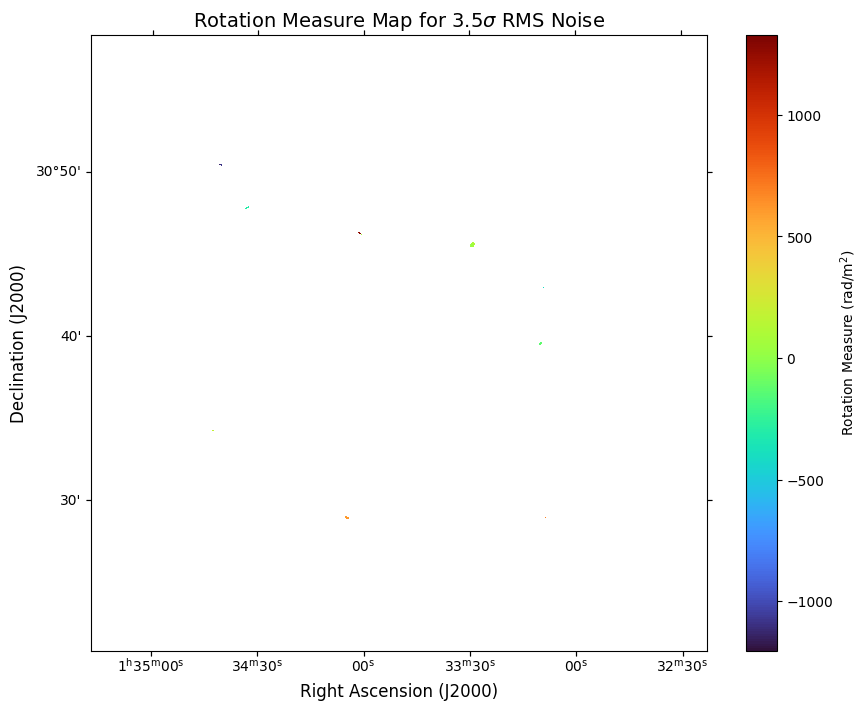

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/pa_sub3_3.5sgma.fits'
pola_chn18 = '/content/drive/MyDrive/M33/pa_sub18_3.5sigma.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Plot RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM.squeeze(), origin='lower', cmap='turbo')  # Squeeze removes unnecessary dimensions
plt.colorbar(im, ax=ax, label='Rotation Measure (rad/m$^2$)')
ax.set_title('Rotation Measure Map for 3.5$\sigma$ RMS Noise', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()

#Rotation Measure for foreground correction(3.5$\sigma$rms noise)

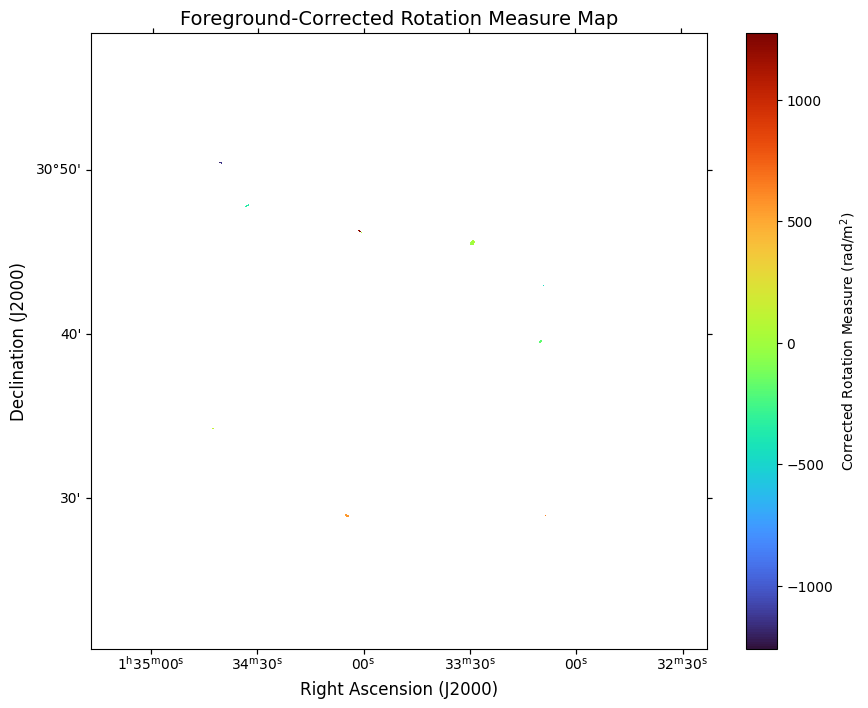

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/pa_sub3_3.5sgma.fits'
pola_chn18 = '/content/drive/MyDrive/M33/pa_sub18_3.5sigma.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Apply foreground correction
forground = -55
RM_cor = RM + forground  # Adding the foreground correction value

# Plot corrected RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM_cor.squeeze(), origin='lower', cmap='turbo')  # Plot corrected RM map
plt.colorbar(im, ax=ax, label='Corrected Rotation Measure (rad/m$^2$)')
ax.set_title('Foreground-Corrected Rotation Measure Map', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()


#Histogram

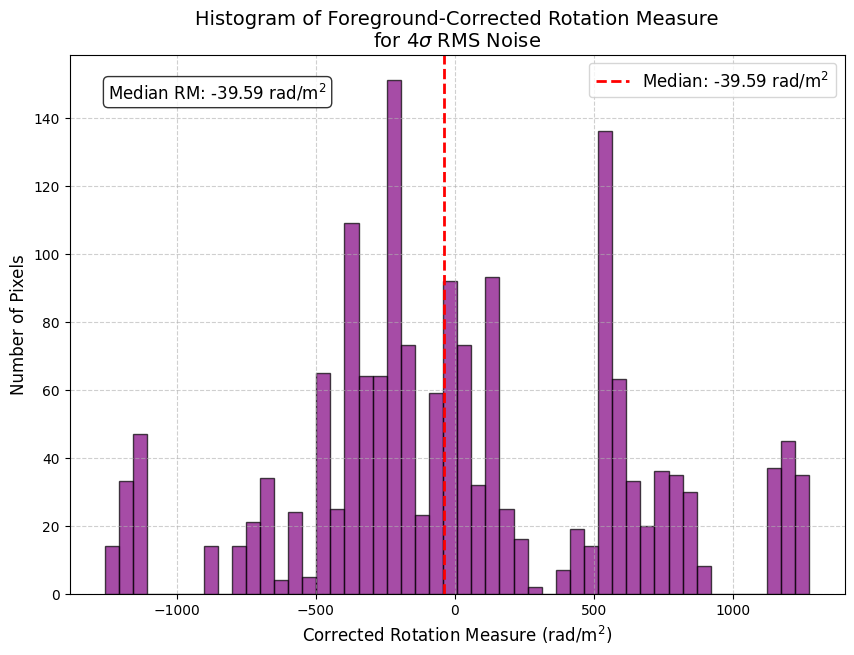

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the corrected RM map to a 1D array, removing NaN values
rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]  # Remove NaN values

# Calculate the median
rm_median = np.median(rm_data_corrected)

# Plot the histogram
plt.figure(figsize=(10, 7))
plt.hist(rm_data_corrected, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Foreground-Corrected Rotation Measure\nfor 4$\sigma$ RMS Noise', fontsize=14)
plt.xlabel('Corrected Rotation Measure (rad/m$^2$)', fontsize=12)
plt.ylabel('Number of Pixels', fontsize=12)
plt.axvline(rm_median, color='red', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.legend(fontsize=12)

# Add a text box with the median value
textstr = f'Median RM: {rm_median:.2f} rad/m$^2$'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Grid and show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()





In [ ]:
psi = 39.59*57.3*lambda_1_sqr

print(psi)

8.199389962289308


# #Rotation Measure for $4\sigma$ rms noise

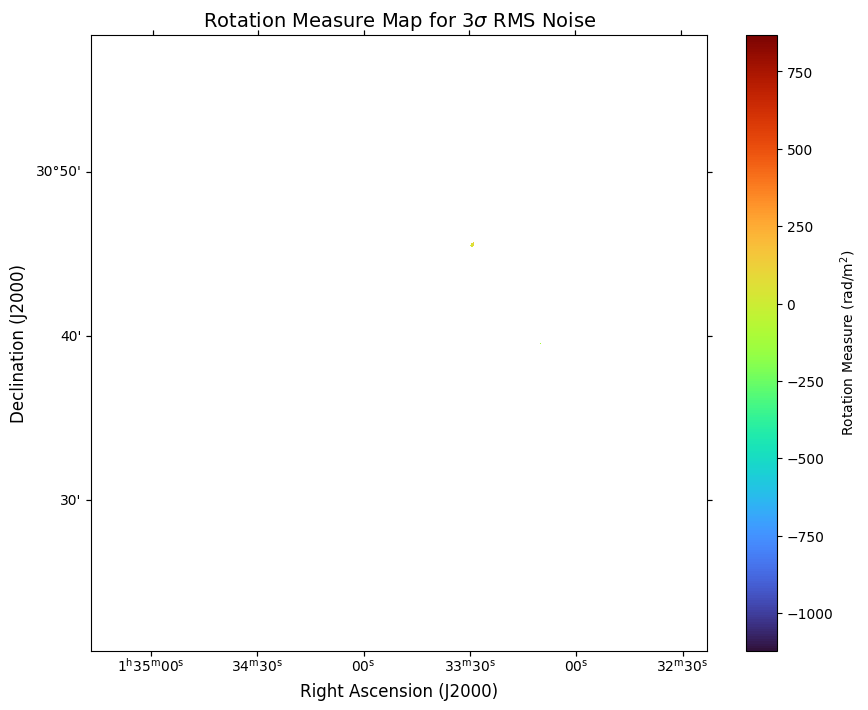

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/pa_sub3_clp4sgma.fits'
pola_chn18 = '/content/drive/MyDrive/M33/pa_sub18_clp4sgma.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Plot RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM.squeeze(), origin='lower', cmap='turbo')  # Squeeze removes unnecessary dimensions
plt.colorbar(im, ax=ax, label='Rotation Measure (rad/m$^2$)')
ax.set_title('Rotation Measure Map for 3$\sigma$ RMS Noise', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()


#Rotation Measure for foreground correction(4$\sigma$rms noise)

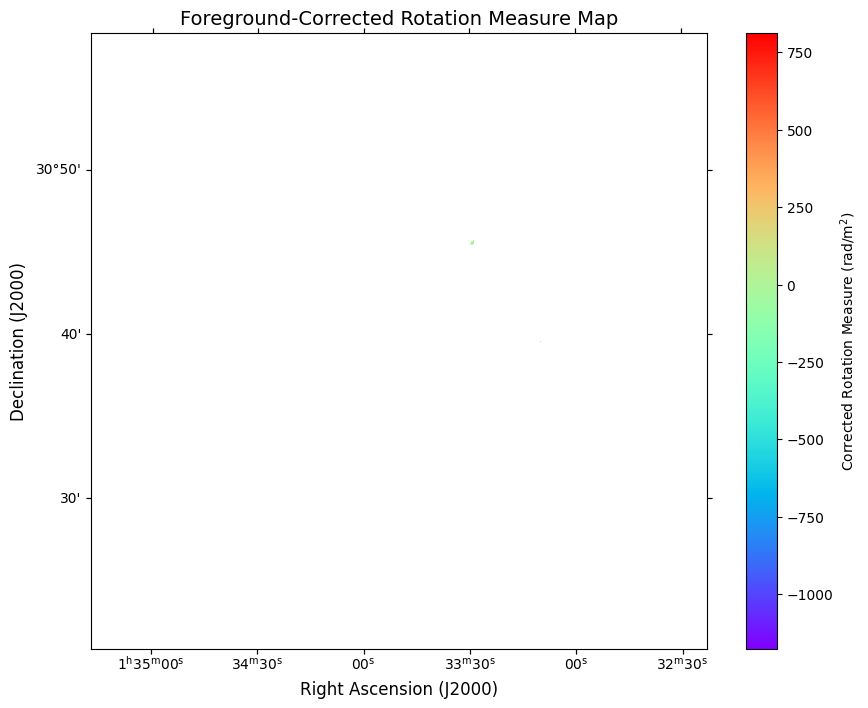

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Paths to input FITS files
pola_chn3 = '/content/drive/MyDrive/M33/pa_sub3_clp4sgma.fits'
pola_chn18 = '/content/drive/MyDrive/M33/pa_sub18_clp4sgma.fits'

# Load FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)

# Extract data and WCS information
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
wcs = WCS(pola_3[0].header)  # Assuming both files have the same WCS

# Close the FITS files
pola_3.close()
pola_18.close()

# Constants
c = 3e8  # Speed of light in m/s
f_1 = 4.99e9  # Frequency in Hz
f_2 = 7.6e9  # Frequency in Hz
lambda_1_sqr = (c / f_1)**2  # Wavelength squared for frequency 1
lambda_2_sqr = (c / f_2)**2  # Wavelength squared for frequency 2

# Calculate RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578  # Convert to radians per square meter

# Apply foreground correction
forground = -55
RM_cor = RM + forground  # Adding the foreground correction value

# Plot corrected RM map with WCS
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)  # Use WCS projection
im = ax.imshow(RM_cor.squeeze(), origin='lower', cmap='rainbow')  # Plot corrected RM map
plt.colorbar(im, ax=ax, label='Corrected Rotation Measure (rad/m$^2$)')
ax.set_title('Foreground-Corrected Rotation Measure Map', fontsize=14)
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)
plt.grid(color='white', ls='--', alpha=0.5)  # Add a grid for clarity
plt.show()


In [ ]:
from astropy.io import fits

# Create a new FITS file with the RM map data
output_fits_path = '/content/drive/MyDrive/M33/RM_Map_4sgma.fits'

# Create a new FITS header by copying the WCS information
header = wcs.to_header()  # Convert WCS to FITS header

# Create a new Primary HDU with data and header
hdu = fits.PrimaryHDU(data=RM, header=header)

# Write the FITS file to disk
hdu.writeto(output_fits_path, overwrite=True)

print(f"RM map saved to: {output_fits_path}")

RM map saved to: /content/drive/MyDrive/M33/RM_Map_4sgma.fits


#Histogram

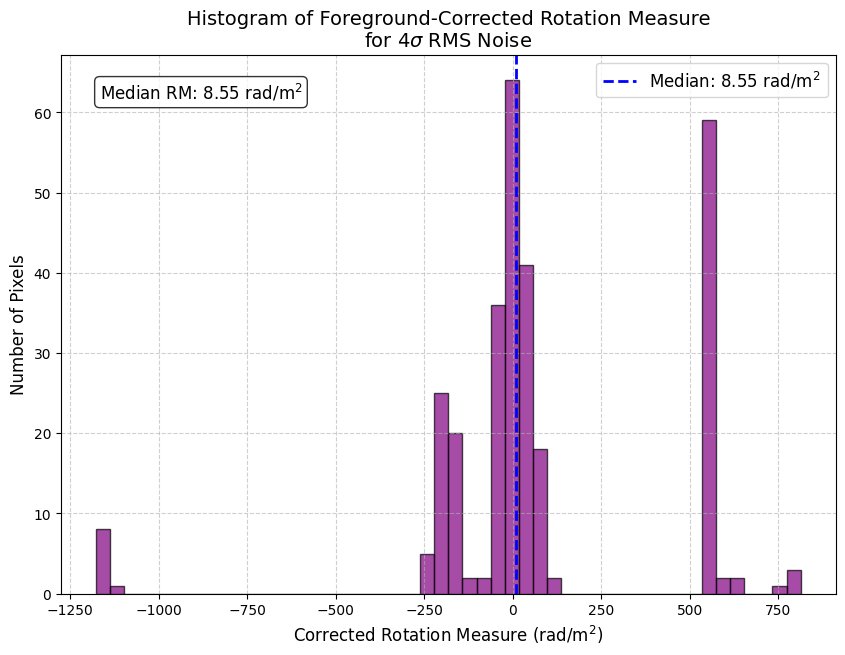

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the corrected RM map to a 1D array, removing NaN values
rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]  # Remove NaN values

# Calculate the median
rm_median = np.median(rm_data_corrected)

# Plot the histogram
plt.figure(figsize=(10, 7))
plt.hist(rm_data_corrected, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Foreground-Corrected Rotation Measure\nfor 4$\sigma$ RMS Noise', fontsize=14)
plt.xlabel('Corrected Rotation Measure (rad/m$^2$)', fontsize=12)
plt.ylabel('Number of Pixels', fontsize=12)
plt.axvline(rm_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.legend(fontsize=12)

# Add a text box with the median value
textstr = f'Median RM: {rm_median:.2f} rad/m$^2$'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Grid and show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
psi = 8.55*57.3*lambda_1_sqr

print(psi)

1.770769996907643


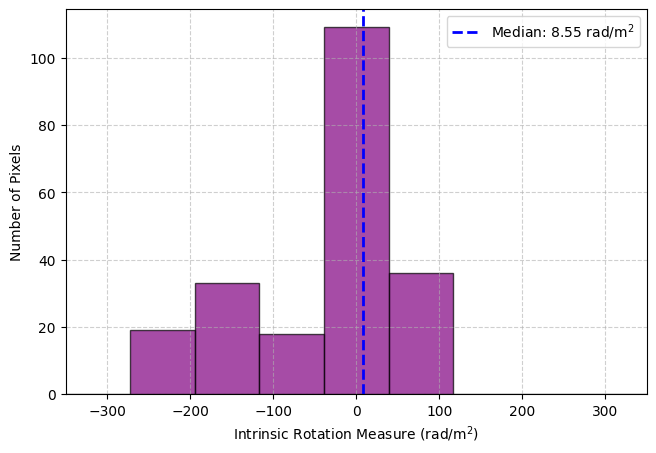

In [ ]:

rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]  # Remove NaN values

# Calculate the median
rm_median = np.median(rm_data_corrected)

# Plot the histogram with specified range
plt.figure(figsize=(7.5, 5))
plt.hist(rm_data_corrected, bins=9, range=(-350, 350), color='purple', alpha=0.7, edgecolor='black')
#plt.title('Histogram of Foreground-Corrected Rotation Measure\nfor 4$\sigma$ RMS Noise (-300 to 200 rad/m$^2$)', fontsize=14)
plt.xlabel('Intrinsic Rotation Measure (rad/m$^2$)')
plt.ylabel('Number of Pixels')
plt.axvline(rm_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.xlim(-350, 350)  # Set x-axis limits
plt.legend()

# Add a text box with the median value
# textstr = f'Median RM: {rm_median:.2f} rad/m$^2$'
# props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#          verticalalignment='top', bbox=props)

# Grid and show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [ ]:
# prompt: compute standard deviation

import numpy as np

# Assuming 'RM_cor' is your RM map data from the previous code
rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]

# Calculate the standard deviation
rm_std_dev = np.std(rm_data_corrected)

print(f"Standard Deviation of RM: {rm_std_dev:.2f} rad/m^2")

Standard Deviation of RM: 346.02 rad/m^2


Standard Deviation of RM: 346.02 rad/m^2


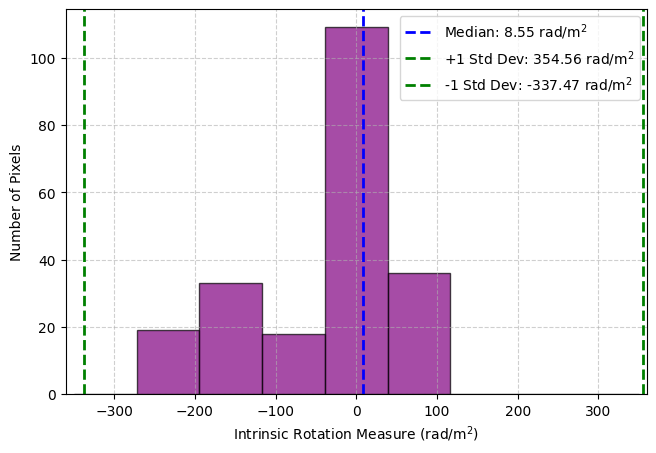

In [ ]:
# prompt: add std to hjstogram plot

import matplotlib.pyplot as plt

rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]

# Calculate the standard deviation
rm_std_dev = np.std(rm_data_corrected)

print(f"Standard Deviation of RM: {rm_std_dev:.2f} rad/m^2")

# Plot the histogram with standard deviation lines
plt.figure(figsize=(7.5, 5))
plt.hist(rm_data_corrected, bins=9, range=(-350, 350), color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Intrinsic Rotation Measure (rad/m$^2$)')
plt.ylabel('Number of Pixels')
plt.axvline(rm_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.axvline(rm_median + rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {rm_median + rm_std_dev:.2f} rad/m$^2$')
plt.axvline(rm_median - rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 Std Dev: {rm_median - rm_std_dev:.2f} rad/m$^2$')

plt.xlim(-360, 360)  # Set x-axis limits
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:

rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]

# Filter data within the specified range
rm_data_in_range = rm_data_corrected[(rm_data_corrected >= -360) & (rm_data_corrected <= 360)]

# Calculate the standard deviation of the filtered data
rm_std_dev = np.std(rm_data_in_range)

print(f"Standard Deviation of RM within the range (-360, 360): {rm_std_dev:.2f} rad/m^2")

Standard Deviation of RM within the range (-360, 360): 90.89 rad/m^2


Standard Deviation of RM within the range (-350, 350): 90.89 rad/m^2


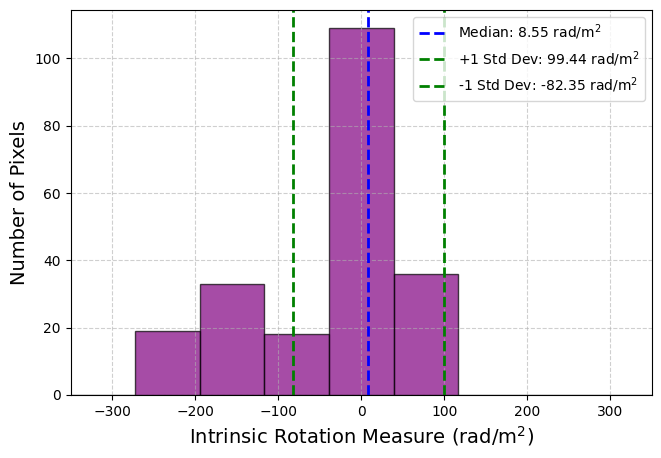

In [ ]:
# prompt: plot std in histogram

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'RM_cor' is your RM map data from the previous code
# and rm_median and rm_std_dev are already calculated

rm_data_corrected = RM_cor.flatten()
rm_data_corrected = rm_data_corrected[~np.isnan(rm_data_corrected)]

# Filter data within the specified range
rm_data_in_range = rm_data_corrected[(rm_data_corrected >= -350) & (rm_data_corrected <= 350)]

# Calculate the standard deviation of the filtered data
rm_std_dev = np.std(rm_data_in_range)

print(f"Standard Deviation of RM within the range (-350, 350): {rm_std_dev:.2f} rad/m^2")

# Plot the histogram with standard deviation lines
plt.figure(figsize=(7.5, 5))
plt.hist(rm_data_in_range, bins=9, range=(-350, 350), color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Intrinsic Rotation Measure (rad/m$^2$)',fontsize=14)
plt.ylabel('Number of Pixels',fontsize=14)
plt.axvline(rm_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.axvline(rm_median + rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {rm_median + rm_std_dev:.2f} rad/m$^2$')
plt.axvline(rm_median - rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 Std Dev: {rm_median - rm_std_dev:.2f} rad/m$^2$')

plt.xlim(-350, 350)  # Set x-axis limits
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

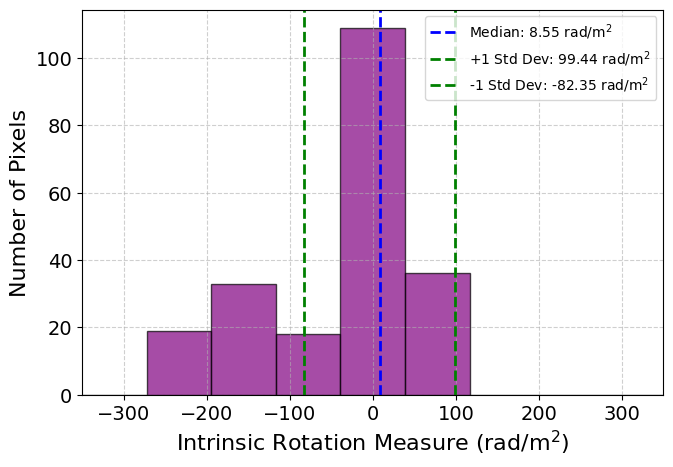

In [ ]:
# prompt: increase the size of numbers in the x and y plot

# ... (Your existing code)

# Plot the histogram with standard deviation lines and increased font size
plt.figure(figsize=(7.5, 5))
plt.hist(rm_data_in_range, bins=9, range=(-350, 350), color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Intrinsic Rotation Measure (rad/m$^2$)', fontsize=16)  # Increased font size
plt.ylabel('Number of Pixels', fontsize=16)  # Increased font size
plt.axvline(rm_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {rm_median:.2f} rad/m$^2$')
plt.axvline(rm_median + rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'+1 Std Dev: {rm_median + rm_std_dev:.2f} rad/m$^2$')
plt.axvline(rm_median - rm_std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 Std Dev: {rm_median - rm_std_dev:.2f} rad/m$^2$')

plt.xticks(fontsize=14) # Increase x-axis tick font size
plt.yticks(fontsize=14) # Increase y-axis tick font size

plt.xlim(-350, 350)  # Set x-axis limits
plt.legend() #Increase legend font size
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()